### Task 1: Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data


### For finding the exploratory data analysis,we will follow the steps as 

#### 1)Understand the Problem:

#### 2)Load the Data:

#### 3)Inspect the Data:

#### 4)Handle Missing Values:

#### 5)Explore Descriptive Statistics:

#### 6)Visualize Categorical Variables:

#### 7)Analyze Relationships Between Variables:

#### 8)Handle Outliers:

#### 9)Feature Engineering:

#### 10)Finalize EDA Report

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### IMPORTING DATASET

In [2]:
test=pd.read_csv("test.csv")
train=pd.read_csv("train.csv")

In [3]:
df=pd.concat([train,test])

#### ABOUT THE DATA

In [4]:
df.shape

(1309, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


#### MISSING VALUE DETECTION AND TREATING

In [7]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

* There are some columns which have Missing and Null Values in the taken Dataset
* the one which have null values are 
        1.survived 
        2.age 
        3.fare 
        4.cabin 
        5.embarked

In [8]:
#missing value treatment
#median imputation
df["Survived"]=df["Survived"].fillna(df["Survived"].median())
df["Age"]=df["Age"].fillna(df["Age"].median())
df["Fare"]=df["Fare"].fillna(df["Fare"].median())

In [9]:
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [10]:
df["Cabin"].fillna(method="bfill",inplace=True)

In [11]:
df["Cabin"].fillna(method="ffill",inplace=True)

In [12]:
df["Embarked"].fillna(method="bfill",inplace=True)

In [13]:
#Checking if missing values are present after imputation
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### OUTLIERS DETECTION AND TREATING

<Axes: >

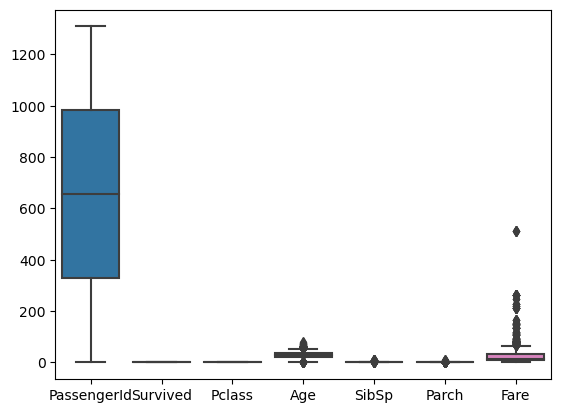

In [14]:
sns.boxplot(df)

##### So we will do outlier treatment using iqr method now.

In [15]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
ll = q1 - 1.5 * iqr
ul = q3 + 1.5 * iqr
df = df[~((df < ll) | (df > ul)).any(axis=1)]

### DATA VISUALIZATION

In [16]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S
5,6,0.0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,E46,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
410,1302,0.0,3,"Naughton, Miss. Hannah",female,28.0,0,0,365237,7.7500,C78,Q
412,1304,0.0,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,C105,S
413,1305,0.0,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,C105,S
415,1307,0.0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,C105,S


##### We can see that after removing all the null ,missing and duplicate values we got 858 rows and 12 columns.

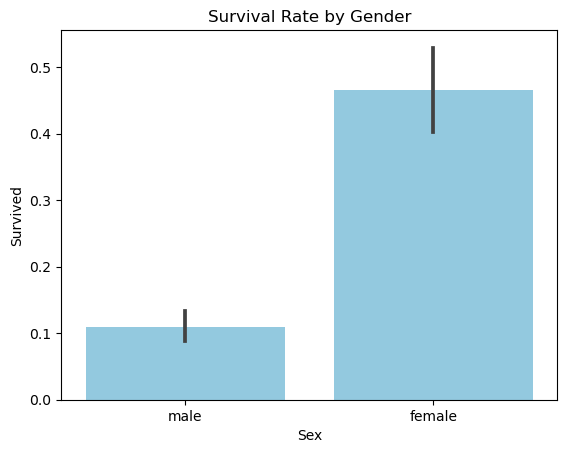

In [20]:
sns.barplot(data=df, y="Survived", x="Sex", color="skyblue")
plt.title('Survival Rate by Gender')
plt.show()

##### In the above graph the most of survived passangers are from the females and females have higher mean value as compared to male

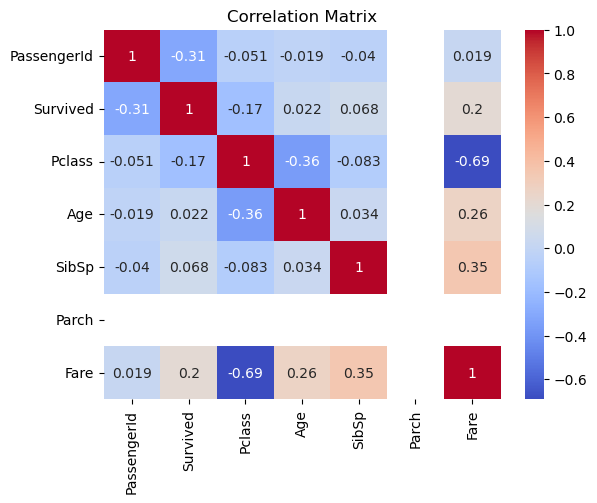

In [22]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

##### In this heatmap data, most of the  obseravtions are postively correlated where sibsp and survived are haveing higher correlation

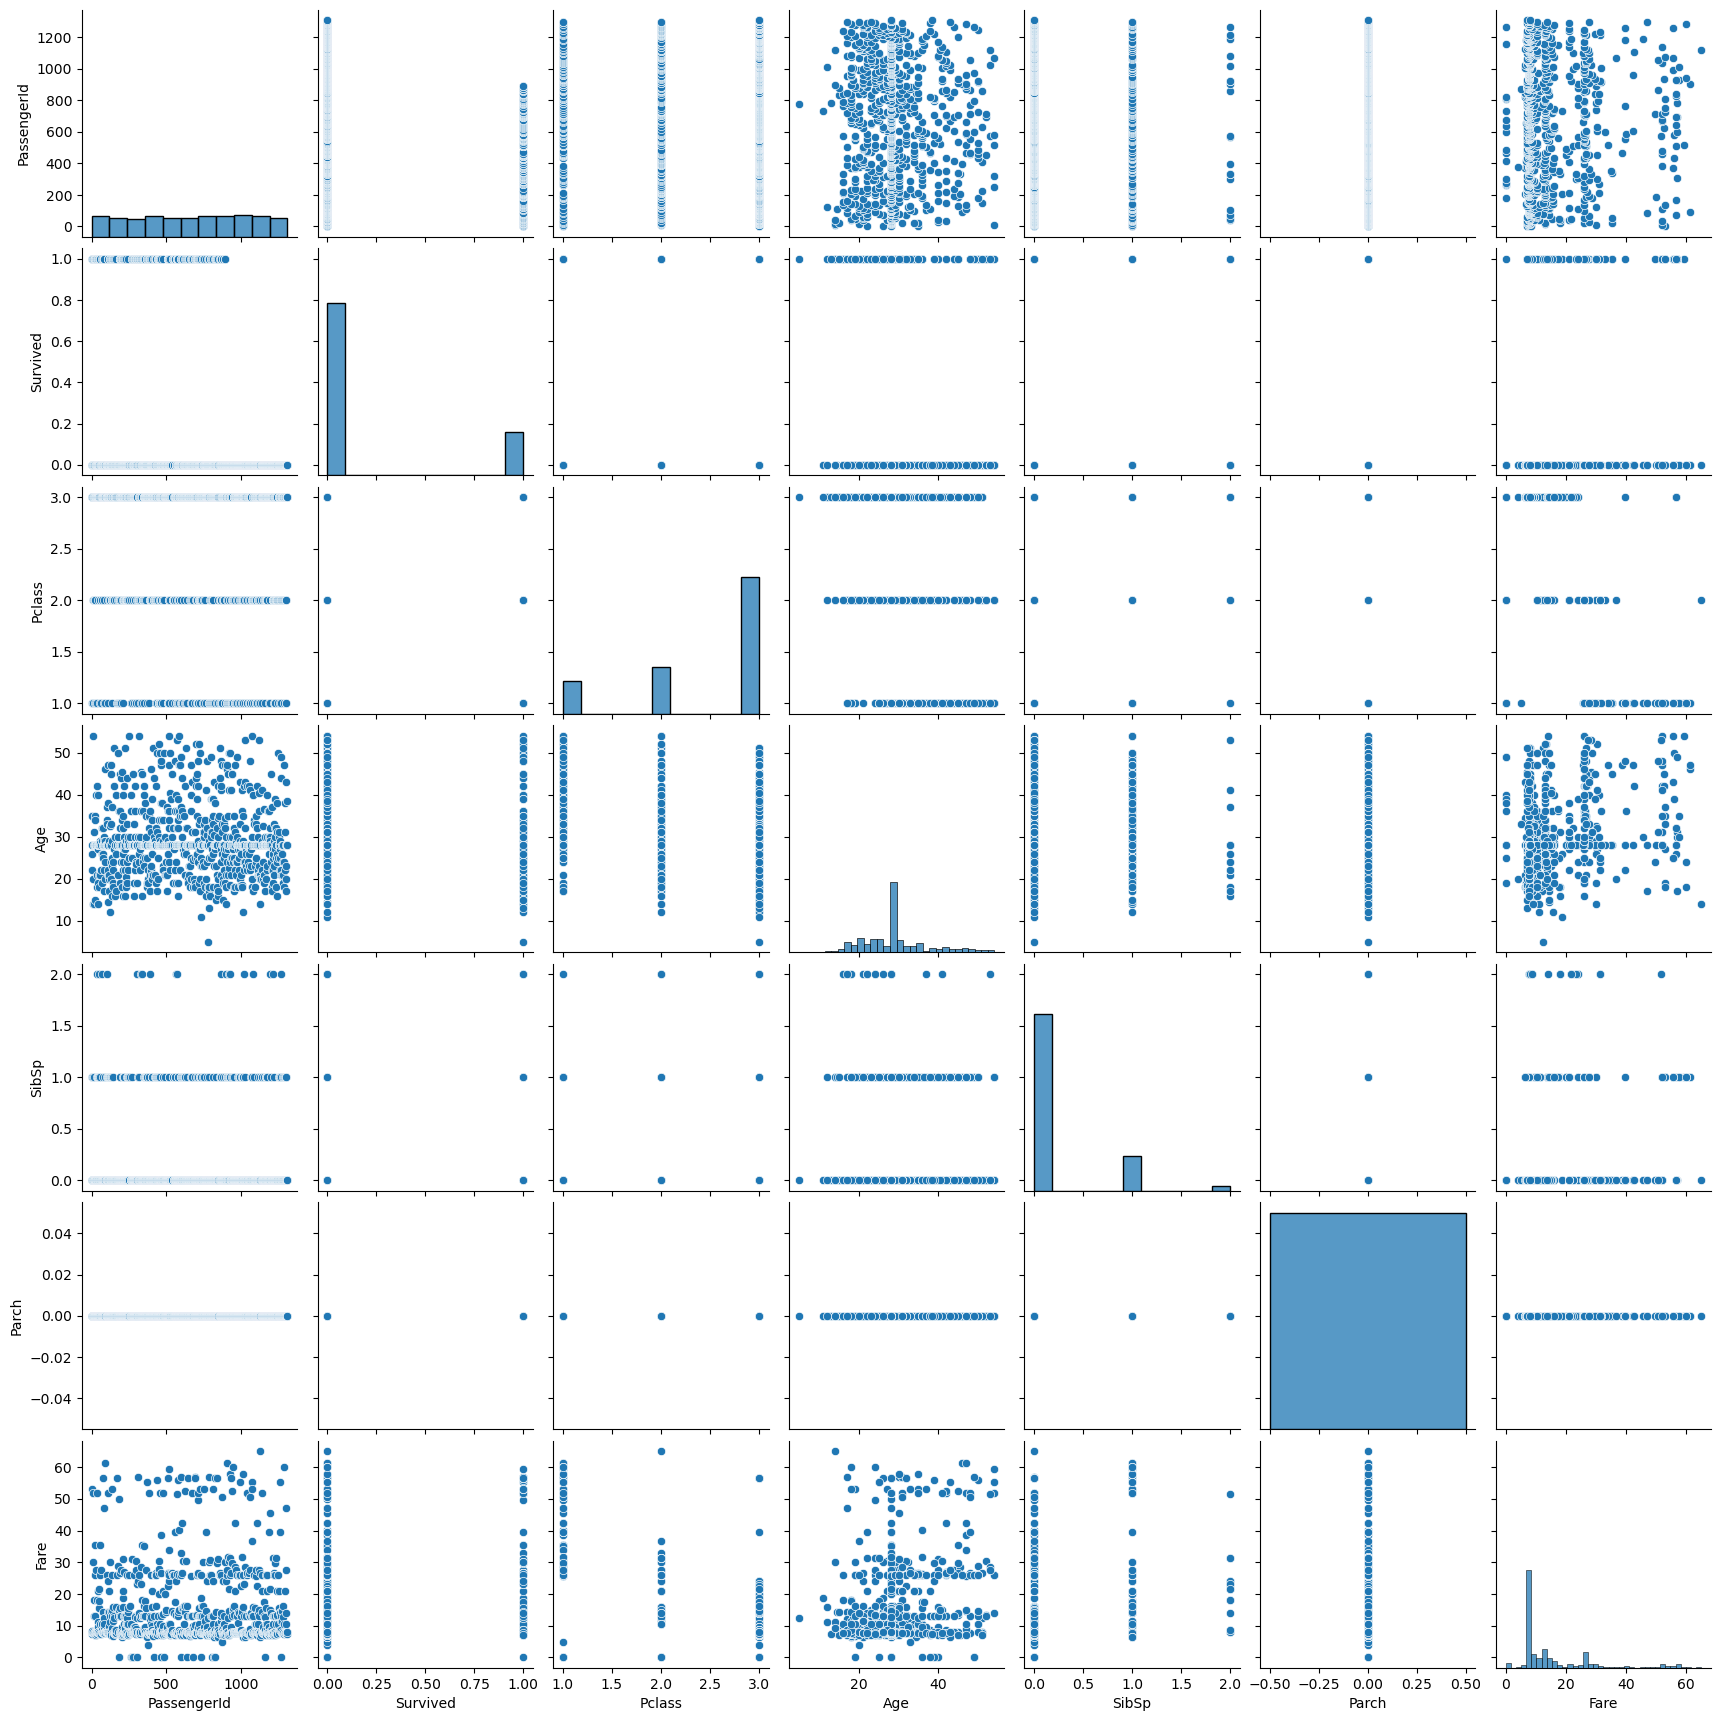

In [23]:
sns.pairplot(df)
plt.show()

### STATISTICAL TESTING


In [26]:
from scipy import stats

for i in df.select_dtypes(np.number).columns:
    stat, p_value = stats.shapiro(df[i])
    print(f"Shapiro-Wilk test for column '{i}':")
    print(f"   - Test Statistic: {stat}")
    print(f"   - P-value: {p_value}")
    
    alpha = 0.05
    if p_value > alpha:
        print("   - The data appears to be normally distributed (fail to reject the null hypothesis)\n")
    else:
        print("   - The data does not appear to be normally distributed (reject the null hypothesis)\n")

Shapiro-Wilk test for column 'PassengerId':
   - Test Statistic: 0.9552919864654541
   - P-value: 1.7156983748276467e-15
   - The data does not appear to be normally distributed (reject the null hypothesis)

Shapiro-Wilk test for column 'Survived':
   - Test Statistic: 0.4915653467178345
   - P-value: 5.74532370373175e-44
   - The data does not appear to be normally distributed (reject the null hypothesis)

Shapiro-Wilk test for column 'Pclass':
   - Test Statistic: 0.6754450798034668
   - P-value: 1.5154027230545954e-37
   - The data does not appear to be normally distributed (reject the null hypothesis)

Shapiro-Wilk test for column 'Age':
   - Test Statistic: 0.9220942258834839
   - P-value: 1.2241026640311011e-20
   - The data does not appear to be normally distributed (reject the null hypothesis)

Shapiro-Wilk test for column 'SibSp':
   - Test Statistic: 0.4856773018836975
   - P-value: 3.923635700109488e-44
   - The data does not appear to be normally distributed (reject the nul

* The above data is not normally distributed,so we go for non parametric test where the data source we are taking the survived as my target column.

In [29]:
new_df=df.copy()

In [30]:
x=new_df.drop("Survived",axis=1)

In [31]:
y=new_df["Survived"]

#### Encoding

In [32]:
from sklearn.preprocessing import OrdinalEncoder
oo=OrdinalEncoder()

In [33]:
x_encod=pd.DataFrame(oo.fit_transform(x),index=x.index,columns=[x  for x in x.columns])

In [34]:
x_encod

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,2.0,89.0,1.0,15.0,1.0,0.0,595.0,18.0,99.0,2.0
2,1.0,2.0,324.0,0.0,22.0,0.0,0.0,746.0,48.0,67.0,2.0
3,2.0,0.0,262.0,0.0,36.0,1.0,0.0,45.0,169.0,67.0,2.0
4,3.0,2.0,16.0,1.0,36.0,0.0,0.0,533.0,50.0,149.0,2.0
5,4.0,2.0,536.0,1.0,25.0,0.0,0.0,287.0,57.0,149.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
410,853.0,2.0,559.0,0.0,25.0,0.0,0.0,497.0,34.0,95.0,1.0
412,854.0,2.0,328.0,0.0,25.0,0.0,0.0,367.0,35.0,61.0,2.0
413,855.0,2.0,737.0,1.0,25.0,0.0,0.0,586.0,50.0,61.0,2.0
415,856.0,2.0,687.0,1.0,41.0,0.0,0.0,705.0,18.0,61.0,2.0


In [35]:
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S
5,6,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,E46,Q
...,...,...,...,...,...,...,...,...,...,...,...
410,1302,3,"Naughton, Miss. Hannah",female,28.0,0,0,365237,7.7500,C78,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,C105,S
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,C105,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,C105,S


#### SCALING

In [36]:
from sklearn.preprocessing import RobustScaler
rb=RobustScaler()

In [37]:
x_scale=pd.DataFrame(rb.fit_transform(x_encod),index=x.index,columns=x.columns)

In [38]:
x_scale

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,-1.000000,0.0,-0.789474,0.0,-0.833333,1.0,0.0,0.570521,-0.525641,0.088608,0.0
2,-0.997666,0.0,-0.239766,-1.0,-0.250000,0.0,0.0,0.954257,-0.141026,-0.316456,0.0
3,-0.995333,-2.0,-0.384795,-1.0,0.916667,1.0,0.0,-0.827192,1.410256,-0.316456,0.0
4,-0.992999,0.0,-0.960234,0.0,0.916667,0.0,0.0,0.412961,-0.115385,0.721519,0.0
5,-0.990665,0.0,0.256140,0.0,0.000000,0.0,0.0,-0.212198,-0.025641,0.721519,-1.0
...,...,...,...,...,...,...,...,...,...,...,...
410,0.990665,0.0,0.309942,-1.0,0.000000,0.0,0.0,0.321474,-0.320513,0.037975,-1.0
412,0.992999,0.0,-0.230409,-1.0,0.000000,0.0,0.0,-0.008895,-0.307692,-0.392405,0.0
413,0.995333,0.0,0.726316,0.0,0.000000,0.0,0.0,0.547649,-0.115385,-0.392405,0.0
415,0.997666,0.0,0.609357,0.0,1.333333,0.0,0.0,0.850064,-0.525641,-0.392405,0.0


In [39]:
x_scale.mean()

PassengerId    1.811553e-18
Pclass        -5.151515e-01
Name           1.556728e-03
Sex           -2.575758e-01
Age            1.110140e-01
SibSp          2.039627e-01
Parch          0.000000e+00
Ticket         2.034814e-03
Fare           1.942054e-01
Cabin         -2.505090e-02
Embarked      -4.335664e-01
dtype: float64

### TRAIN TEST SPLIT

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
xtrain,xtest,ytrain,ytest=train_test_split(x_scale,y,random_state=0,test_size=0.3)

In [43]:
print('X_Train shape is:',xtrain.shape)
print('X_Test shape is:',xtest.shape)
print('Y_Train shape is:',ytrain.shape)
print('Y_Test shape is:',ytest.shape)

X_Train shape is: (600, 11)
X_Test shape is: (258, 11)
Y_Train shape is: (600,)
Y_Test shape is: (258,)


#### we have done all the steps for finding the EDA